In [3]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
        
    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        # Get the jpg image file and its corresponding tif image
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        tif_path = os.path.join(self.img_dir, img_name.replace('.jpg', '.tif'))
        
        # Load images
        img = Image.open(img_path).convert('L')  # Convert to grayscale ('L') for single channel
        target = Image.open(tif_path).convert('L')  # Assuming the target is also grayscale ('L')
        
        # Apply any transformations (e.g., resize, normalization, etc.)
        if self.transform:
            img = self.transform(img)
            target = self.transform(target)
        
        return img, target

# Define the directory where the images are located
img_dir = '/Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/Labels_circle'

# Define any transformations (optional, for example, converting to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
])

# Create the dataset
dataset = ImageDataset(img_dir=img_dir, transform=transform)

# Function to save dataset as a .pt file
def save_dataset_to_pt(dataset, save_path):
    images = []
    targets = []
    
    for img, target in dataset:
        images.append(img)
        targets.append(target)
    
    # Convert lists to tensors and save
    images_tensor = torch.stack(images)
    targets_tensor = torch.stack(targets)
    
    torch.save((images_tensor, targets_tensor), save_path)
    print(f"Dataset saved to {save_path}")

# Define the save path for the .pt file
save_path = '/Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/data/dataset.pt'  # Change to the path where you want to save the file

# Save the dataset
save_dataset_to_pt(dataset, save_path)


Dataset saved to /Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/data/dataset.pt


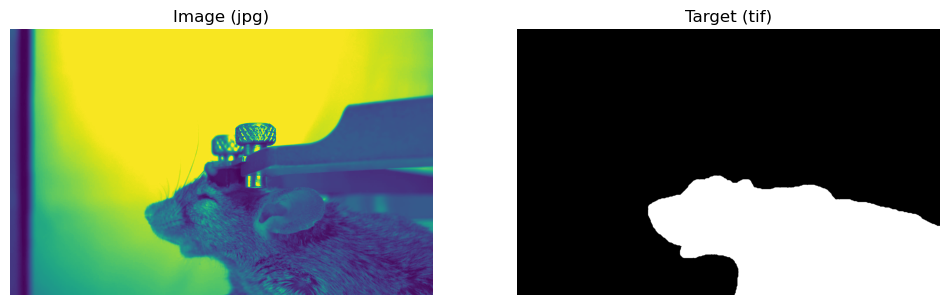

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the .pt file
dataset_path = '/Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/data/dataset.pt'  # Update with your file path
images_tensor, targets_tensor = torch.load(dataset_path)

# Convert tensors to numpy arrays for displaying with matplotlib
# Note: Since the images are in (C, H, W) format (channels, height, width), we need to permute them to (H, W, C) for display
image_np = images_tensor[0].permute(1, 2, 0).numpy()
target_np = targets_tensor[0].squeeze().numpy()  # Squeeze if the target is single channel (grayscale)

# Display the first image and its corresponding target
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display image
ax[0].imshow(image_np)
ax[0].set_title("Image (jpg)")
ax[0].axis('off')

# Display target
ax[1].imshow(target_np, cmap='gray')
ax[1].set_title("Target (tif)")
ax[1].axis('off')

plt.show()


In [5]:
import torch
from PIL import Image
import os

# Load the saved dataset
dataset_path = '/Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/data/dataset.pt'

# Load the tensor dataset (images and targets)
images_tensor, targets_tensor = torch.load(dataset_path)

# Convert the first image (from tensor to PIL image)
first_image_tensor = images_tensor[0]  # Get the first image in the tensor
first_image_pil = transforms.ToPILImage()(first_image_tensor)  # Convert tensor to PIL image

# Define the directory where the image will be saved
save_dir = '/Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/saved_images'
os.makedirs(save_dir, exist_ok=True)

# Save the first image as a .jpg file
save_path = os.path.join(save_dir, 'first_image.jpg')
first_image_pil.save(save_path)

print(f"First image saved to {save_path}")


First image saved to /Users/annastuckert/Documents/GitHub/DeepEnsampleGUI/napari-threshold/Unet_training/saved_images/first_image.jpg
